# Model Development

in this notebook i'm going to develop prediction models to predict the car price


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
filename = "automobileEDA.csv"

response = requests.get(url)
with open(filename, "wb") as f:
    f.write(response.content)

In [3]:
df = pd.read_csv(filename, header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Linear Regression

i'll get final model with structure as:

Yhat = a + b  X

In [4]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [5]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [6]:
lm.intercept_
lm.coef_

array([-821.73337832])

so we get the final model structure as :

Price = 38423.31 - 821.73 x highway-mpg

Now lets check for 'engine-size'

In [7]:
lm1 = LinearRegression()
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)
Yhat = lm1.predict(X)
Yhat[0:5]
lm1.intercept_
lm1.coef_

array([166.86001569])

we get,

Price=-7963.34 + 166.86*df['engine-size']

## Multiple Linear Regression

the eqaution is given by:

Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4

from the EDA we know the other good predictor variables :
 <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>

  now let's develop the model using these variables as the predictor variables

In [8]:
z = df[['horsepower','curb-weight','engine-size','highway-mpg']]
lm.fit(z, df['price'])
Yhat = lm.predict(z)
Yhat[0:5]
lm.intercept_
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

we get the equation :    
Price = -15806.62462632918 + 53.49574423 x horsepower + 4.70770099 x curb-weight + 81.53026382 x engine-size + 36.05748882 x highway-mpg

## 2. Model Evaluation Using Visualization

now i'll evaluate this models using visualization


In [9]:
import seaborn as sns
%matplotlib inline

Regression plot


Let's visualize highway-mpg as potential predictor variable of price:

(0.0, 48172.380990858466)

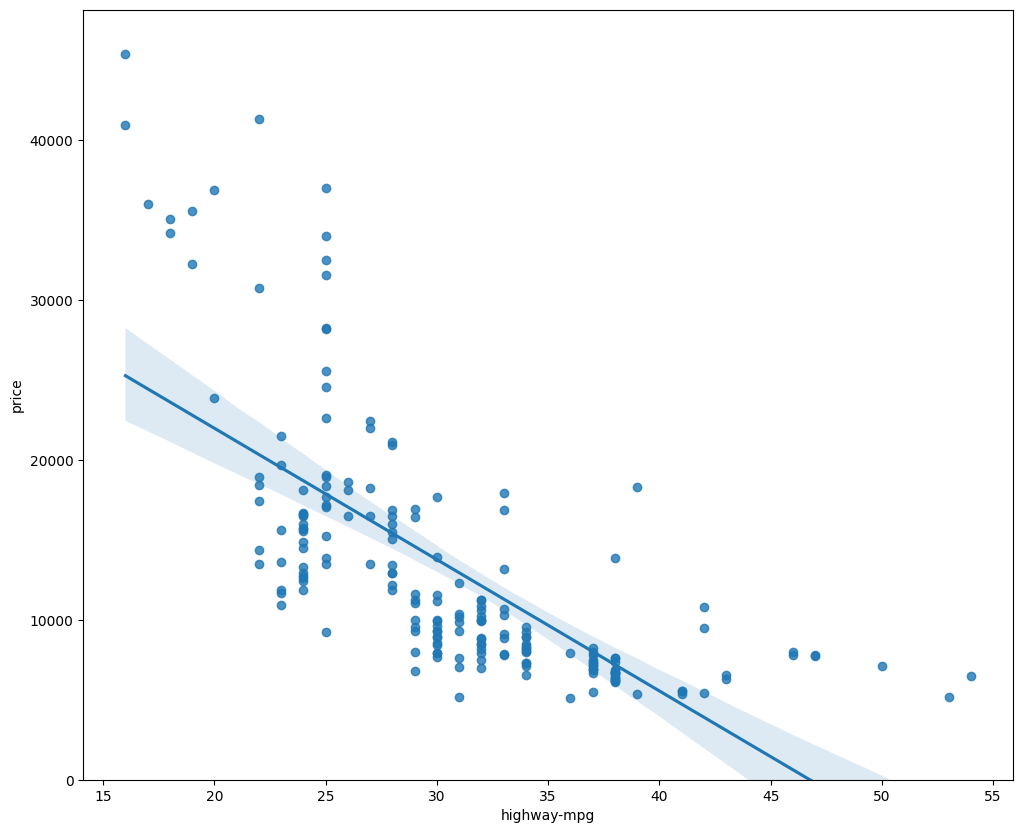

In [10]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Let's compare this plot to the regression plot of "peak-rpm":

(0.0, 47414.1)

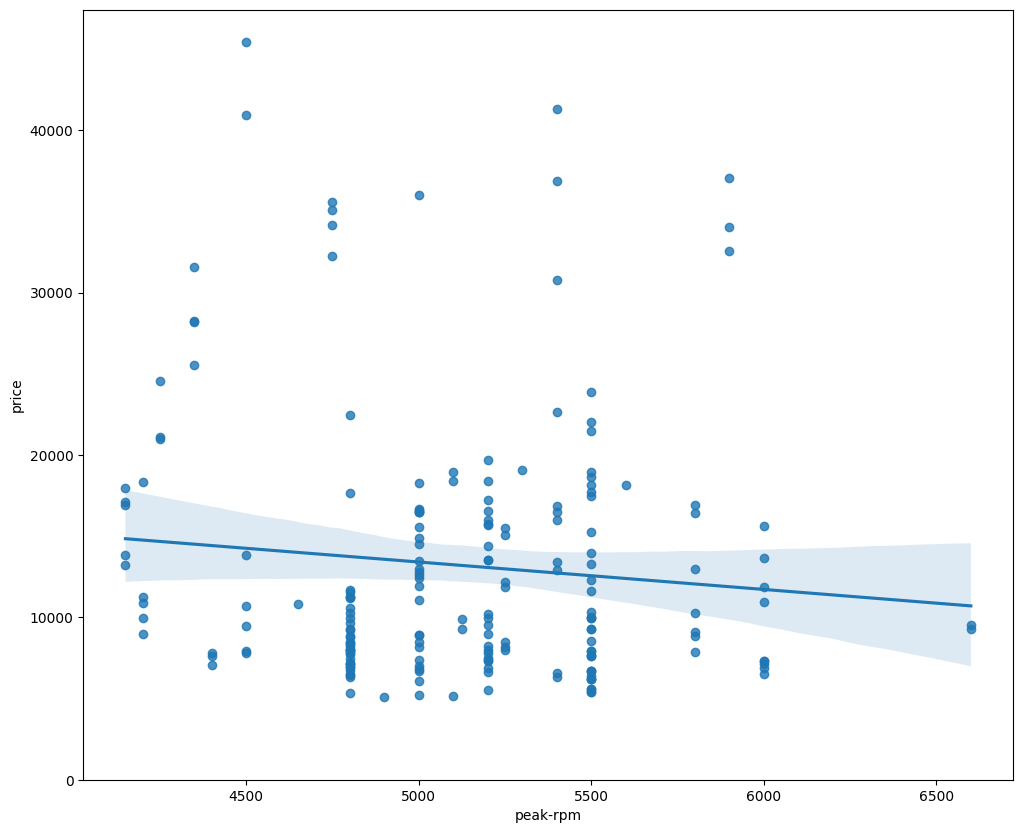

In [11]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

let's check the correlation between 'peak-rpm', 'highway-mpg' and 'price'

In [12]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


## Residual Plot
We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

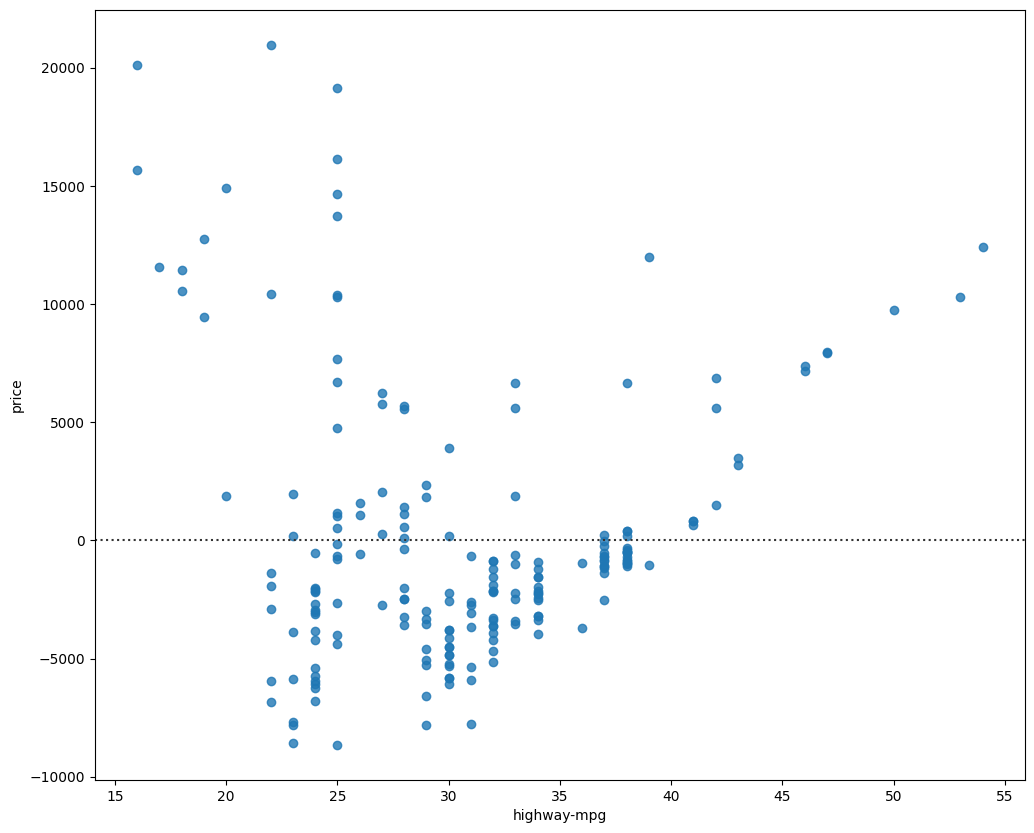

In [13]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

From this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data

## Multiple Linear Regression

In [15]:
Y_hat = lm.predict(z)


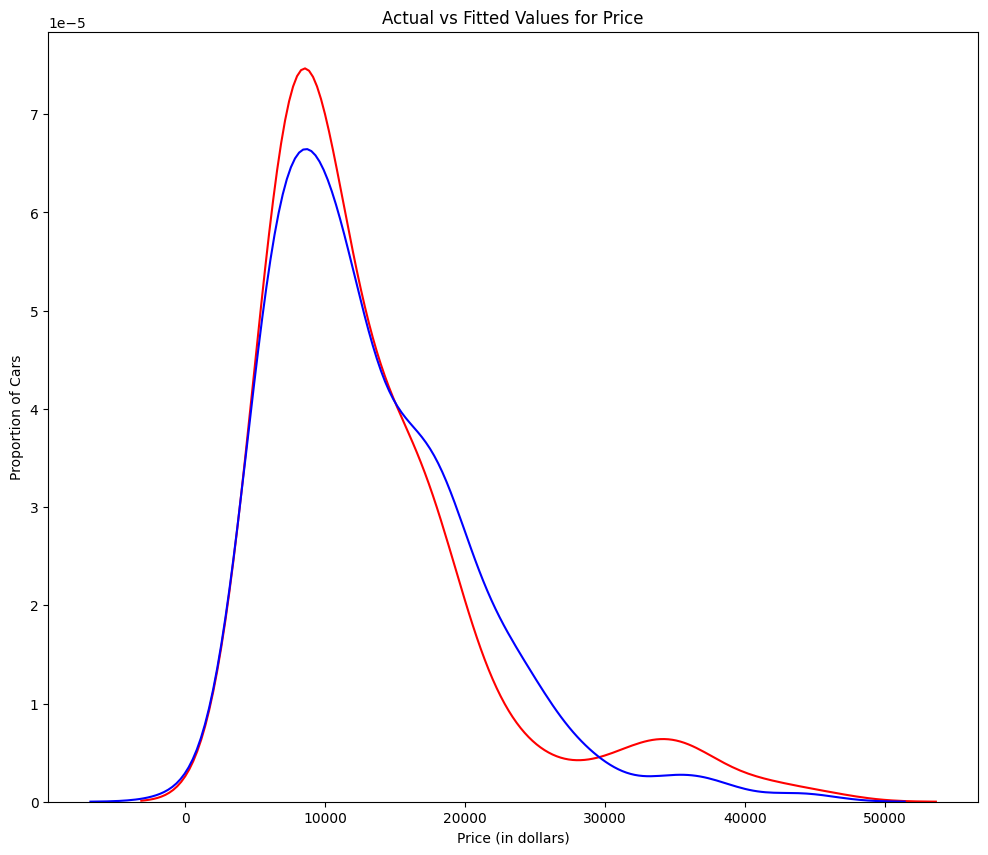

In [16]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

## 3. Polynomial Regression and Pipelines

We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [17]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [18]:
x = df['highway-mpg']
y = df['price']

In [19]:
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


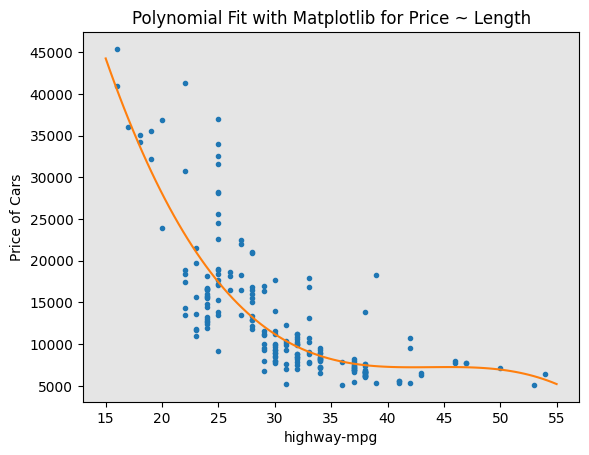

In [20]:
PlotPolly(p, x, y, 'highway-mpg')

In [21]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

let's try for 11 order

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


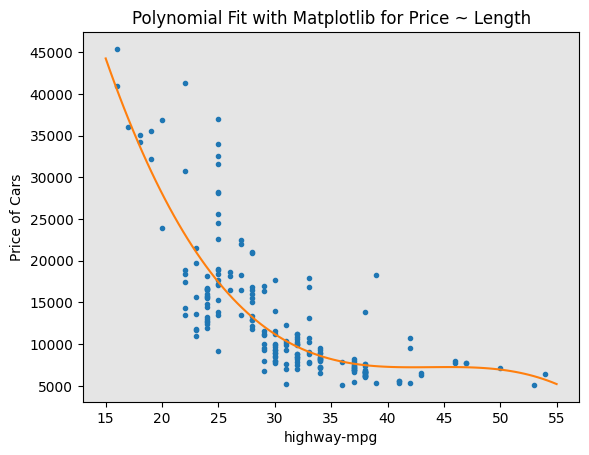

In [22]:
# Write your code below and press Shift+Enter to execute
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f)
print(p1)
PlotPolly(p, x, y, 'highway-mpg')

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [26]:
Z_pr=pr.fit_transform(z)

In [28]:
z.shape

(201, 4)

In [29]:
Z_pr.shape

(201, 15)

## Pipeline



In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [31]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [32]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [34]:
Z = z.astype(float)
pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [35]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [36]:
Input = [('scale',StandardScaler()),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015])

## 4. Measures for In-Sample Evaluation

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

* R^2 / R-squared
* Mean Squared Error (MSE)

### Model 1: Simple Linear Regression

Let's calculate the R^2:

In [37]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


We can say that ~49.659% of the variation of the price is explained by this simple linear model, which is built using the highway_mpg data.

Let's calculate the MSE:

In [38]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.025174143


### Model 2: Multiple Linear Regression

Let's calculate the R^2:

In [41]:
# fit the model
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE:

In [42]:
Y_predict_multifit = lm.predict(Z)

In [43]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Model 3: Polynomial Fit

Let's calculate the R^2:

In [44]:
from sklearn.metrics import r2_score

In [45]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

MSE:

In [46]:
mean_squared_error(df['price'], p(x))

20474146.426361218

### 5. Prediction and Decision Making

In [47]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [48]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [49]:
lm.fit(X, Y)
lm

LinearRegression()

In [50]:
yhat=lm.predict(new_input)
yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

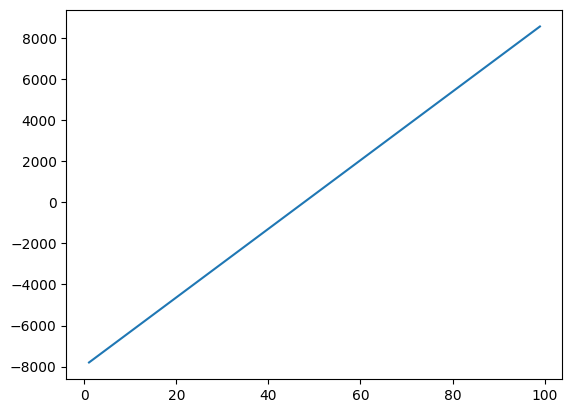

In [51]:
plt.plot(new_input, yhat)
plt.show()

### Decision Making: Determining a Good Model Fit

condition :    
1. The model with the higher R-squared value is a better fit for the data.
2. The model with the smallest MSE value is a better fit for the data.


**Let's take a look at the values for the different models.**

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

* R-squared: 0.49659118843391759
* MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

* R-squared: 0.80896354913783497
* MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

* R-squared: 0.6741946663906514
* MSE: 2.05 x 10^7

**Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)**



In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

* MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
* R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR.
The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

**Simple Linear Model (SLR) vs. Polynomial Fit**

* MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
* R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

**Multiple Linear Regression (MLR) vs. Polynomial Fit**

* MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
* R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.


### **Conclusion**

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.